In [1]:
# Magics
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Imports
import logging

import elfi
import pylfire
import graphviz

import numpy as np
import matplotlib.pyplot as plt

from pylfire.models import arch

 /Users/umvremes/anaconda/envs/bonfire_new/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
 /Users/umvremes/anaconda/envs/bonfire_new/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning:The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).


In [3]:
# Get logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [4]:
# Get the arch model
m = arch.get_model(seed_obs=123)

INFO:pylfire.models.arch:true_params were not given. Now using [t1, t2] = [0.3, 0.7].


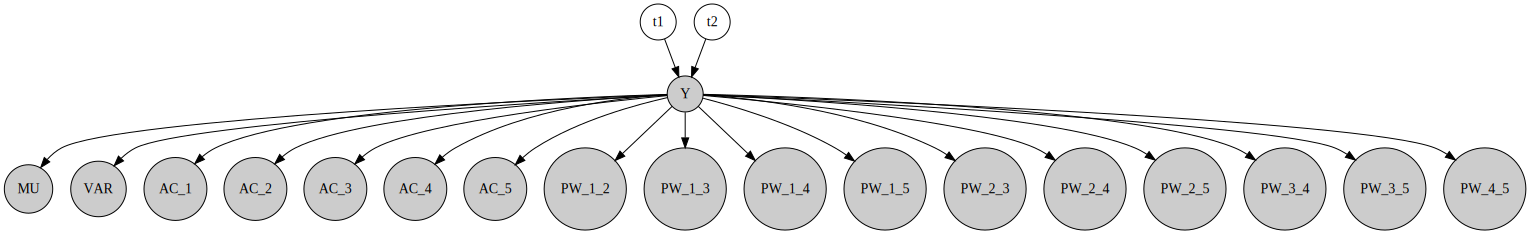

In [5]:
# Draw the model
elfi.draw(m)

In [6]:
# Create a grid for parameters
n = 25

t1 = np.linspace(-1, 1, n)
t2 = np.linspace(0, 1, n)

tt1, tt2 = np.meshgrid(t1, t2, indexing='ij')

params_grid = np.c_[tt1.flatten(), tt2.flatten()]

In [7]:
from pylfire.methods.lfire import LFIRE

until here what we did is identical to what we would do when we do not have a pretrained posterior model

but now we initialise with pretrained data:

In [8]:
pre_filename='arch_model_1_500.npz'

In [9]:
%%time
lfire_method = LFIRE(
    model=m,
    params_grid=params_grid,
    batch_size=500,
    pre_filename=pre_filename
)

CPU times: user 15.2 ms, sys: 3.22 ms, total: 18.4 ms
Wall time: 20.7 ms


In [10]:
# Run inference
%time lfire_res = lfire_method.infer()

CPU times: user 39.9 ms, sys: 1.46 ms, total: 41.3 ms
Wall time: 47.6 ms


In [11]:
# Print summary
lfire_res.summary()

Method: LFIRE
Number of simulations: 0
MAP estimates: t1: 0.417, t2: 0.625
Posterior means: t1: 0.303, t2: 0.715



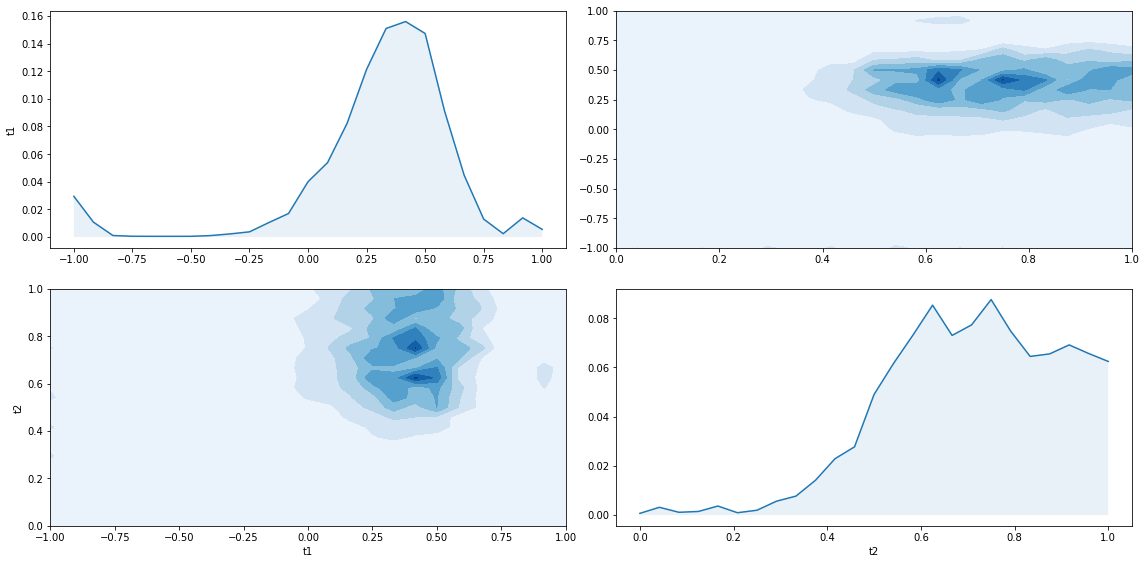

In [12]:
# Visualize pairs
lfire_res.plot_pairs();